In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import geopandas as gpd 
import os 
import re

In [2]:
starbucks_ca = pd.read_csv('starbucks_in_california.csv')
starbucks_city = pd.read_csv('starbucks_in_california_city_stats.csv')
starbucks_county = pd.read_csv('starbucks_in_california_county_stats.csv')

In [3]:
starbucks_ca.head(5)

,id,name,ownership_type,phone_number,address,city,county,zip,coordinates,state,...,starbucks_reserve_clover_brewed,oven_warmed_food,free_wi_fi,verismo_system,mobile_payment,digital_rewards,la_boulange,fizzio_handcrafted_sodas,drive_thru,link
0,9128,100 West Portal/Vicente,Company Owned,(415) 664-8370,"100 West Portal, 941271306 San Francisco Coun...",San Francisco - San Francisco County,San Francisco County,941271306,POINT(-122.467323 37.739684),California,...,True,True,False,False,True,True,True,False,False,http://www.starbucks.com/store/9128/us
1,14672,"10th & Hwy 14, Palmdale",Company Owned,661-266-2314,"39904 10th Street West, 935513003 Los Angeles...",Palmdale - Los Angeles County,Los Angeles County,935513003,POINT(-118.147264 34.607218),California,...,False,True,True,False,True,True,True,True,True,http://www.starbucks.com/store/14672/us
2,8147,"10th & Market, San Diego",Company Owned,619-696-3750,"1011 Market Street, 921017233 San Diego Count...",San Diego - San Diego County,San Diego County,921017233,POINT(-117.155362 32.711361),California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/8147/us
3,15457,11th & Corral Hollow - Tracy,Company Owned,209-830-1348,"1857 W. 11th Street, 953763727 San Joaquin Co...",Tracy - San Joaquin County,San Joaquin County,953763727,POINT(-121.451307 37.739591),California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/15457/us
4,10036,"11th & Grand, Los Angeles",Company Owned,2137491751,"1111 South Grand Avenue, 900152176 Los Angele...",Los Angeles - Los Angeles County,Los Angeles County,900152176,POINT(-118.262377 34.041593),California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/10036/us


In [4]:
starbucks_city.head(1)

,id,city,county,number_of_starbucks,starbucks_per_million_inhabitants,starbucks_per_10_sq_mile,median_age,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,Monterey Park - Los Angeles County,Monterey Park,Los Angeles County,1,17,1.30,43.1,"$51,736",60269,19,7.67,1,1.0,68.0,364.0,125.0,1.0


In [5]:
starbucks_county.head(1)

,county,number_of_starbucks,starbucks_per_million_inhabitants,starbucks_per_10_sq_mile,median_age,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,Siskiyou County,1,22.0,0.002,47.0,37865.0,44900.0,85.0,6287.0,1,4.0,1.0,47.0,3.0,45.0


In [6]:
def format_coordinates(coord_str):
    match = re.search(r"POINT\(([-\d.]+) ([\d.]+)\)", coord_str)
    if match:
        return (float(match.group(1)), float(match.group(2)))
    return coord_str

starbucks_ca['coordinates'] = starbucks_ca['coordinates'].apply(format_coordinates)

starbucks_ca.head()

,id,name,ownership_type,phone_number,address,city,county,zip,coordinates,state,...,starbucks_reserve_clover_brewed,oven_warmed_food,free_wi_fi,verismo_system,mobile_payment,digital_rewards,la_boulange,fizzio_handcrafted_sodas,drive_thru,link
0,9128,100 West Portal/Vicente,Company Owned,(415) 664-8370,"100 West Portal, 941271306 San Francisco Coun...",San Francisco - San Francisco County,San Francisco County,941271306,"(-122.467323, 37.739684)",California,...,True,True,False,False,True,True,True,False,False,http://www.starbucks.com/store/9128/us
1,14672,"10th & Hwy 14, Palmdale",Company Owned,661-266-2314,"39904 10th Street West, 935513003 Los Angeles...",Palmdale - Los Angeles County,Los Angeles County,935513003,"(-118.147264, 34.607218)",California,...,False,True,True,False,True,True,True,True,True,http://www.starbucks.com/store/14672/us
2,8147,"10th & Market, San Diego",Company Owned,619-696-3750,"1011 Market Street, 921017233 San Diego Count...",San Diego - San Diego County,San Diego County,921017233,"(-117.155362, 32.711361)",California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/8147/us
3,15457,11th & Corral Hollow - Tracy,Company Owned,209-830-1348,"1857 W. 11th Street, 953763727 San Joaquin Co...",Tracy - San Joaquin County,San Joaquin County,953763727,"(-121.451307, 37.739591)",California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/15457/us
4,10036,"11th & Grand, Los Angeles",Company Owned,2137491751,"1111 South Grand Avenue, 900152176 Los Angele...",Los Angeles - Los Angeles County,Los Angeles County,900152176,"(-118.262377, 34.041593)",California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/10036/us


In [7]:
import geopandas as gpd 

path = "tl_2022_us_state.shp"
df = gpd.read_file(path)
df = df.to_crs("EPSG:4326")

<Figure size 2500x1500 with 0 Axes>

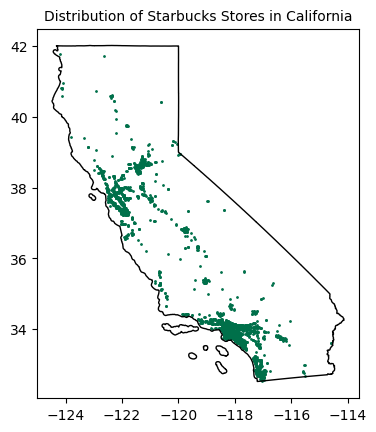

In [12]:

plt.figure(figsize=(25, 15))

df[df['STUSPS'] == 'CA'].boundary.plot(edgecolor='black', linewidth=1, facecolor='none')

for coord in starbucks_ca['coordinates']:
    plt.scatter(coord[0], coord[1], color='#00704A', s=1)  
plt.title("Distribution of Starbucks Stores in California", fontsize=10)

plt.show()


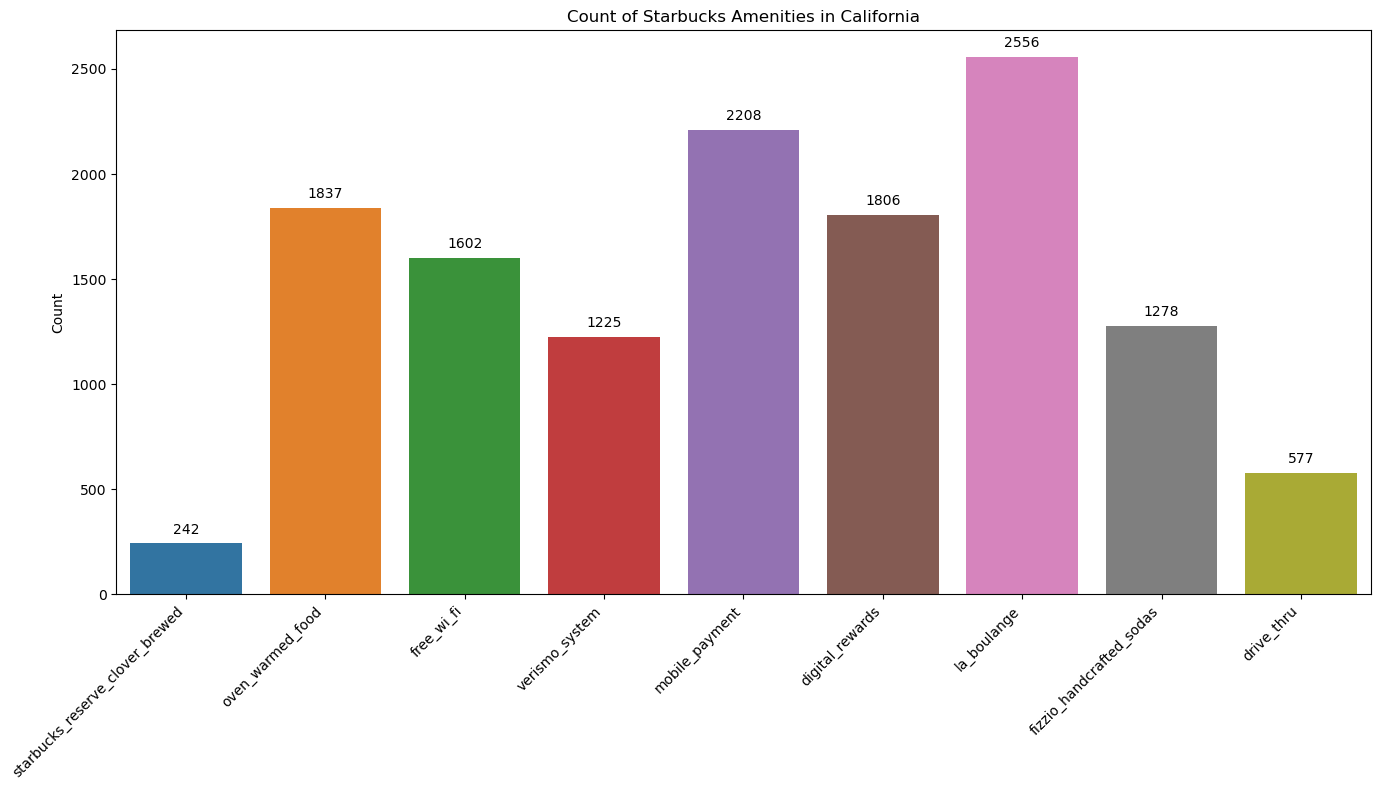

In [30]:
import seaborn as sns


amenities_cols = [
    'starbucks_reserve_clover_brewed', 'oven_warmed_food', 'free_wi_fi',
    'verismo_system', 'mobile_payment', 'digital_rewards', 'la_boulange',
    'fizzio_handcrafted_sodas', 'drive_thru'
]

amenities_sum = starbucks_ca[amenities_cols].sum()

plt.figure(figsize=(14, 8))
sns_bar = sns.barplot(x=amenities_sum.index, y=amenities_sum.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Starbucks Amenities in California')

for p in sns_bar.patches:
    sns_bar.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()


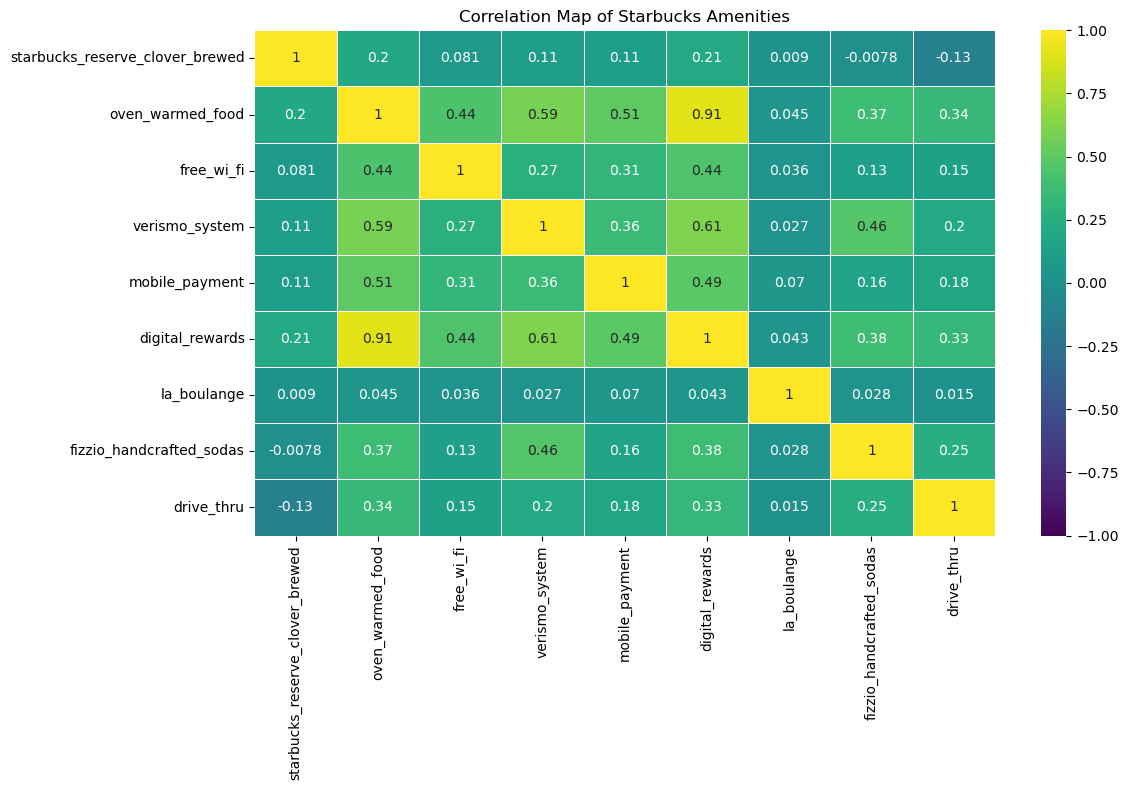

In [28]:

correlation_matrix = starbucks_ca[amenities_cols].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Map of Starbucks Amenities')
plt.tight_layout()
plt.show()


<Figure size 2500x1500 with 0 Axes>

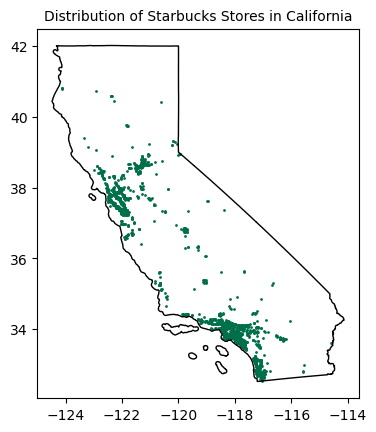

In [17]:

plt.figure(figsize=(25, 15))

df[df['STUSPS'] == 'CA'].boundary.plot(edgecolor='black', linewidth=1, facecolor='none')

for coord in starbucks_ca['coordinates'][starbucks_ca['drive_thru']==0]:
    plt.scatter(coord[0], coord[1], color='#00704A', s=1)  
plt.title("Distribution of Starbucks Stores in California", fontsize=10)

plt.show()


<Figure size 2500x1500 with 0 Axes>

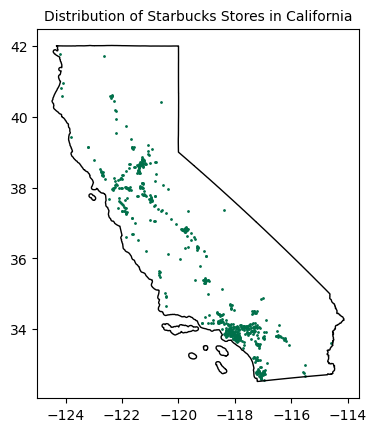

In [18]:

plt.figure(figsize=(25, 15))

df[df['STUSPS'] == 'CA'].boundary.plot(edgecolor='black', linewidth=1, facecolor='none')

for coord in starbucks_ca['coordinates'][starbucks_ca['drive_thru']==1]:
    plt.scatter(coord[0], coord[1], color='#00704A', s=1)  
plt.title("Distribution of Starbucks Stores in California", fontsize=10)

plt.show()